In [44]:
"""
Line plot
Histogram and density plots
Box and whiskers plot
Heat maps for correlations 
And 3D surface maps
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/pcf/expenditures.csv')

#print(df.columns)

#df.info()

df.candidate_name.unique()

array(['RUBIO, MARCO', 'SANTORUM, RICHARD J.', 'PERRY, JAMES R. (RICK)',
       'CARSON, BENJAMIN S.', "CRUZ, RAFAEL EDWARD 'TED'", 'PAUL, RAND',
       'CLINTON, HILLARY RODHAM'], dtype=object)

In [45]:
df['candidate'] = df['candidate_name'].str.split(',').str[0]
df.drop(['candidate_id', 'candidate_name','file_number', 'transaction_id',
       'election_type','memo_code', 'memo_text'],axis=1, inplace=True)

print(df.columns)

Index(['committee_id', 'recipient_name', 'disbursement_amount',
       'disbursement_date', 'recipient_city', 'recipient_state',
       'recipient_zipcode', 'disbursement_desc', 'form_type', 'candidate'],
      dtype='object')


In [46]:
df.head()

,committee_id,recipient_name,disbursement_amount,disbursement_date,recipient_city,recipient_state,recipient_zipcode,disbursement_desc,form_type,candidate
0,C00458844,"GREEN, PERRY MR.",500.00,15-Sep-15,ANCHORAGE,AK,995084442,IN-KIND CONTRIBUTION,SB23,RUBIO
1,C00458844,ALASKA REPUBLICAN PARTY,2500.00,16-Nov-15,ANCHORAGE,AK,99503,BALLOT ACCESS,SB23,RUBIO
2,C00458844,"JOHNSON, MARK",1000.00,30-Sep-15,ANCHORAGE,AK,995163436,IN-KIND CONTRIBUTION,SB23,RUBIO
3,C00458844,ENTERPRISE,336.09,18-Dec-15,BIRMINGHAM,AL,352124572,CAR RENTAL,SB23,RUBIO
4,C00458844,U.S. SPACE AND ROCKET CENTER,2000.00,7-Apr-16,HUNTSVILLE,AL,35805,SITE RENTAL,SB23,RUBIO


In [47]:
df.isnull().sum()

committee_id            0
recipient_name          0
disbursement_amount     0
disbursement_date       0
recipient_city          2
recipient_state         0
recipient_zipcode      20
disbursement_desc       3
form_type               0
candidate               0
dtype: int64

In [48]:
df.shape
df.dropna(axis=0,how='any',inplace=True)
pd.to_datetime(df['disbursement_date'])
df.info()

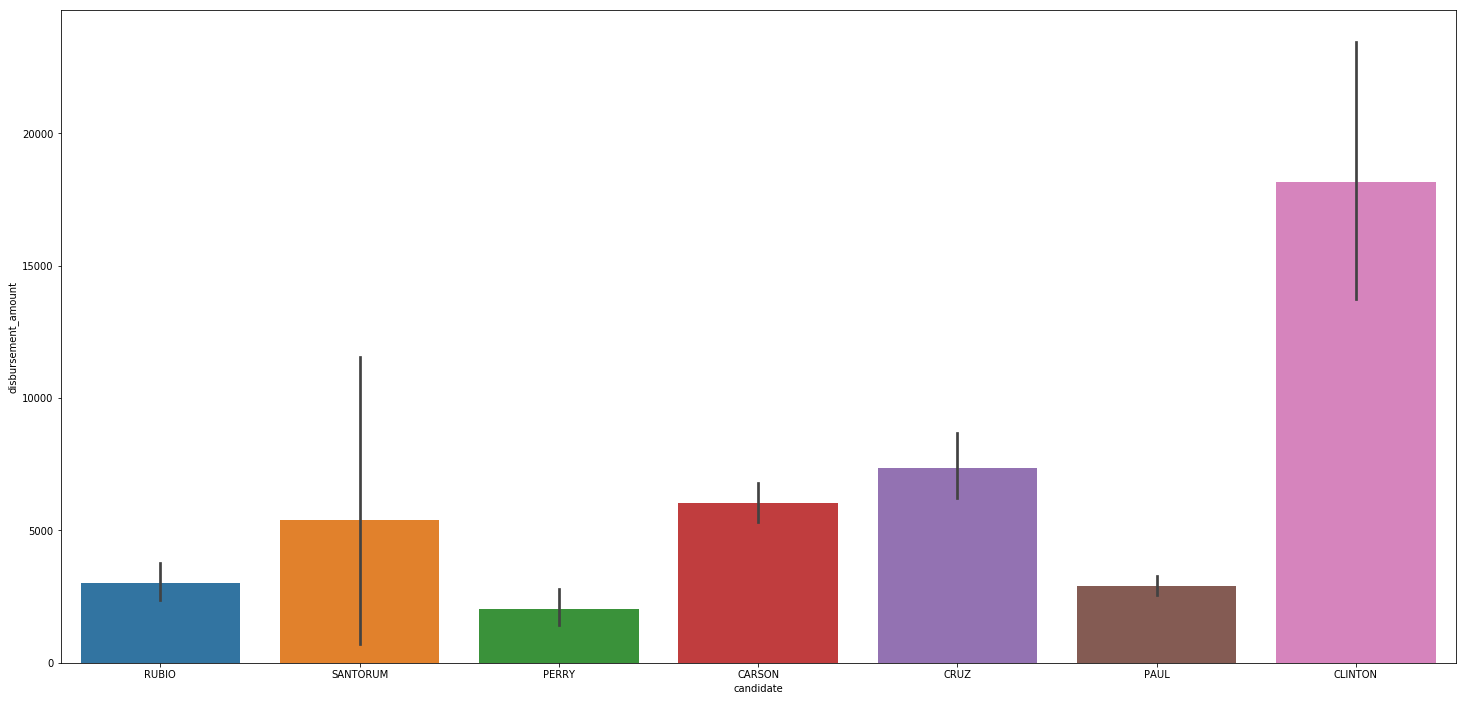

In [49]:
#plt.figuresize()
fig = plt.subplots(figsize=(25,12))
ax = sns.barplot(x='candidate',y='disbursement_amount', data=df )

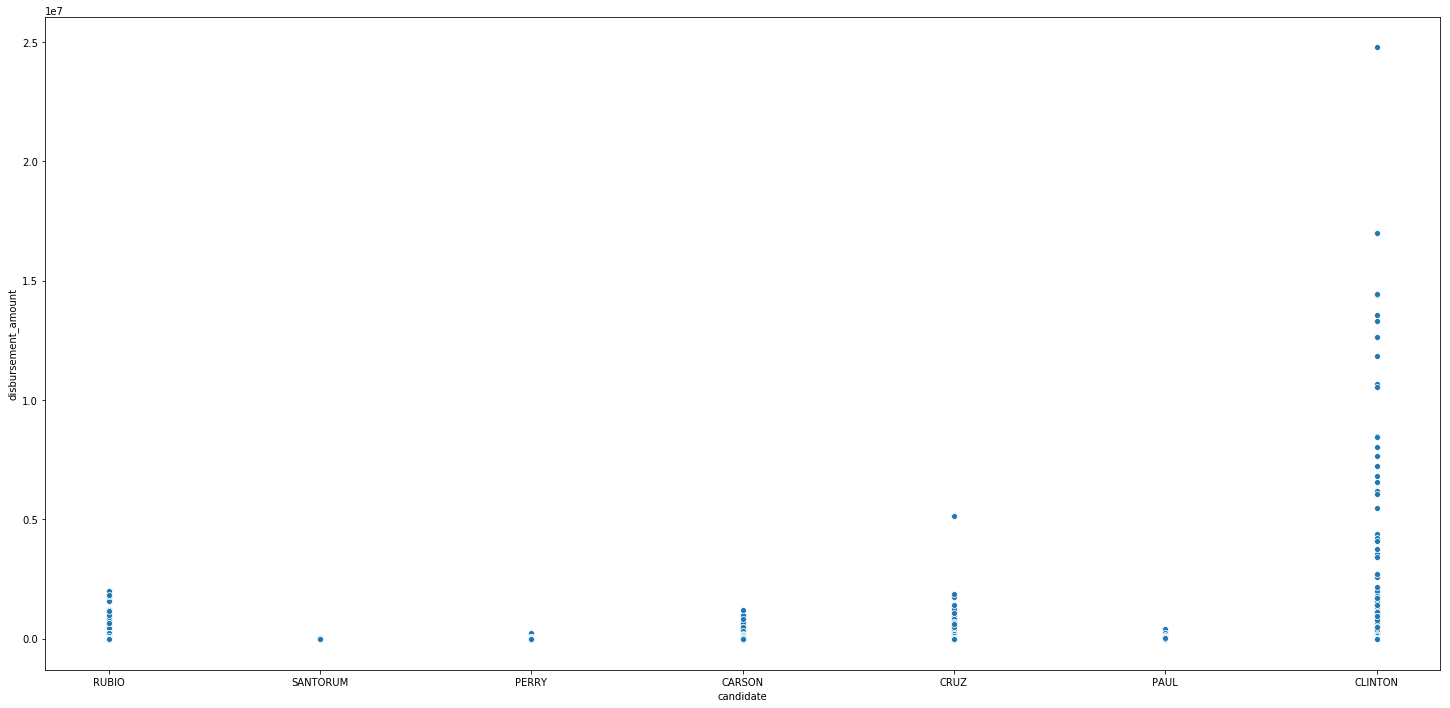

In [50]:
fig = plt.subplots(figsize=(25,12))
ax = sns.scatterplot(x='candidate',y='disbursement_amount', data=df )

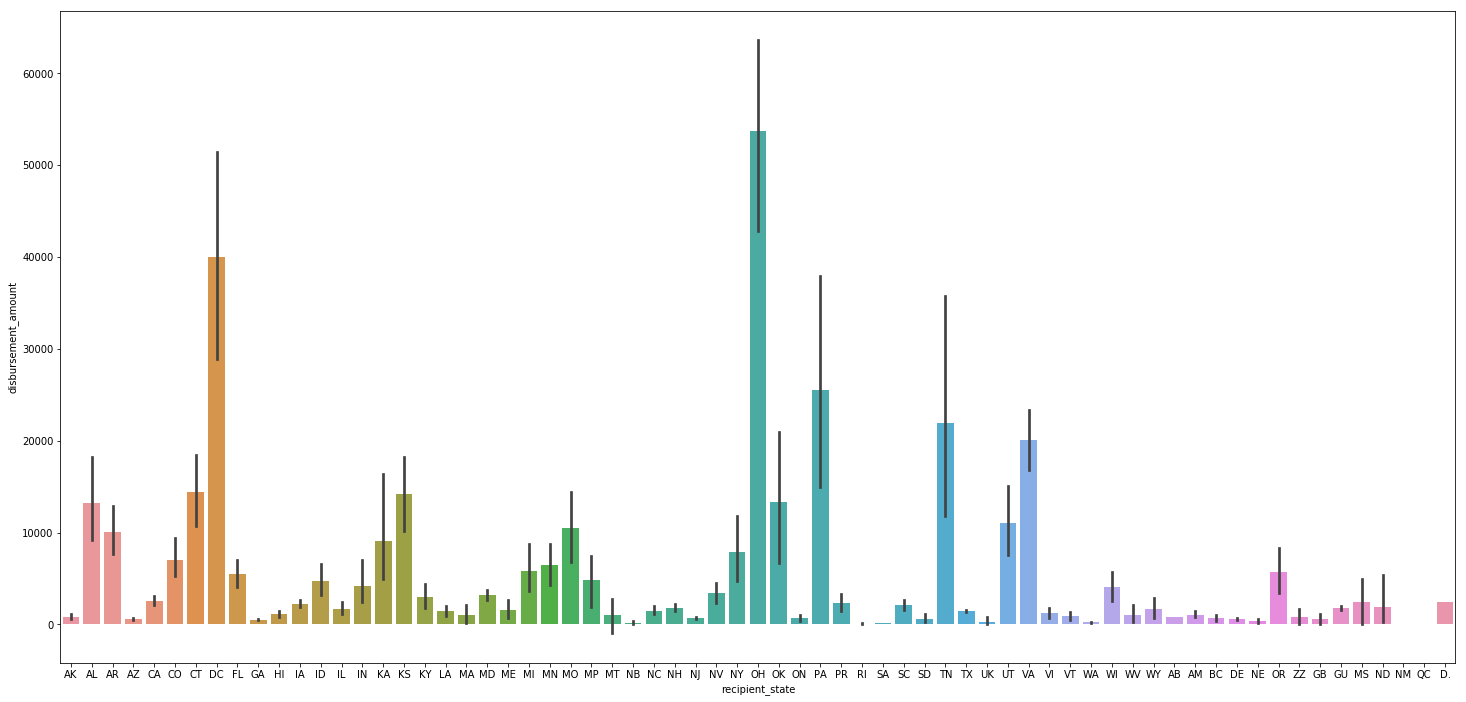

In [51]:
fig = plt.subplots(figsize=(25,12))
ax = sns.barplot(x='recipient_state',y='disbursement_amount', data=df )

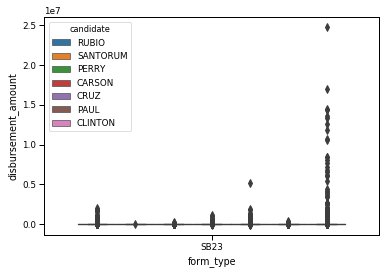

In [78]:
ax = sns.boxplot(x='form_type',hue='candidate', y='disbursement_amount',data=df)

In [83]:
print(len(df.form_type.unique()))

1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65475 entries, 0 to 65498
Data columns (total 10 columns):
committee_id           65475 non-null object
recipient_name         65475 non-null object
disbursement_amount    65475 non-null float64
disbursement_date      65475 non-null object
recipient_city         65475 non-null object
recipient_state        65475 non-null object
recipient_zipcode      65475 non-null object
disbursement_desc      65475 non-null object
form_type              65475 non-null object
candidate              65475 non-null object
dtypes: float64(1), object(9)
memory usage: 8.0+ MB


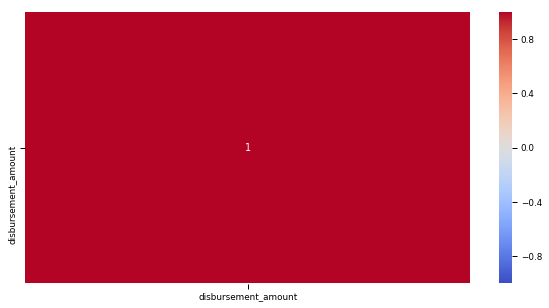

In [85]:
corr = df.corr()

# Sets the graph dimensions
plt.figure(figsize=(10,5))

hmap = sns.heatmap(corr, annot=True, vmin=-1.0,vmax=1.0, linewidth = 0.5, cmap='coolwarm')